### logistic_regression 은 분류기다 . 

* 분류 문제는 0 또는 1로 예측해야 하나 linear regression을 그대로 적용하면 예측값이 0보다 작거나 1보다 큰 값을 가질 수 있음 

* 따라서 예측값을 항상 0에서 1사이의 값을 갖도록 hypothesis함수를 수정 

* logistic regression에서 cost function을 재정의 
* cost function은 최적의 최소값 세타를 구하는 과정 

In [1]:
import pandas as pd

red_wine = pd.read_csv('../data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('../data/winequality-white.csv', sep = ';')

wine = pd.concat([red_wine, white_wine])

In [2]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']


In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver = 'liblinear' , random_state = 13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('train acc :' ,accuracy_score(y_train, y_pred_tr))
print('test acc :' ,accuracy_score(y_test, y_pred_test))

train acc : 0.7361939580527227
test acc : 0.7376923076923076


In [6]:
from random import random
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler' , StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=13))]
## scaler 적용시키고 , decisiontree 적용시기키기 

pipe = Pipeline(estimators) 

In [7]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [8]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('train acc :' ,accuracy_score(y_train, y_pred_tr))
print('test acc :' ,accuracy_score(y_test, y_pred_test))

## 스케일러를 적용하면 조금 분류 정확성이 올라감 살짝 

train acc : 0.7404271695208774
test acc : 0.7384615384615385


In [10]:
wine_tree = DecisionTreeClassifier(max_depth = 2 , random_state = 13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [12]:
models = {'logistic regression' : pipe, 'decision tree' : wine_tree}

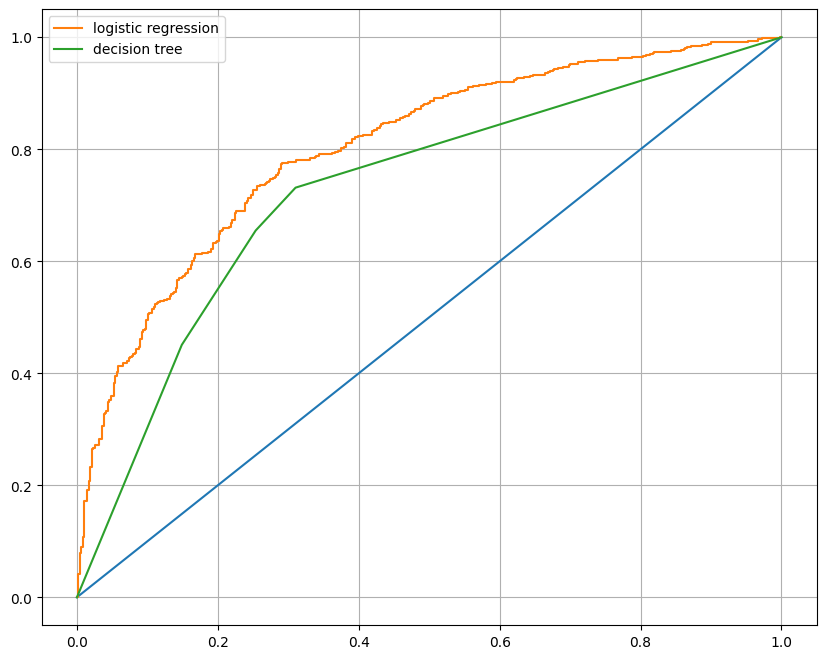

In [15]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)


plt.grid()
plt.legend()
plt.show()